# Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [4]:
data = pd.read_csv(r'AAPL.csv')

# Data Preprocessing

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,18.556429,18.685356,18.299286,18.303213,16.067413,262620400
1,2013-11-08,18.377857,18.611786,18.306786,18.591429,16.320423,279316800


In [7]:
data.shape

(2516, 7)

In [8]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(0)

In [16]:
df = data['Adj Close'].values

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df.reshape(-1, 1))

sequence_length = 4
sequences = []
targets = []

for i in range(len(df) - sequence_length):
    sequences.append(df[i:i+sequence_length])
    targets.append(df[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [22]:
df

array([[0.00220742],
       [0.00360901],
       [0.00334674],
       ...,
       [0.89687865],
       [0.89178208],
       [0.90607445]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# Building the Model

In [27]:
import tensorflow as tf
from tensorflow import keras
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(keras.layers.Dense(1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\rites\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\rites\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Training the model

In [29]:
model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)


print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step 
RNN Mean Squared Error: 0.00011373417759124047
LSTM Mean Squared Error: 0.0001318560676222566


# Visualize the data

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


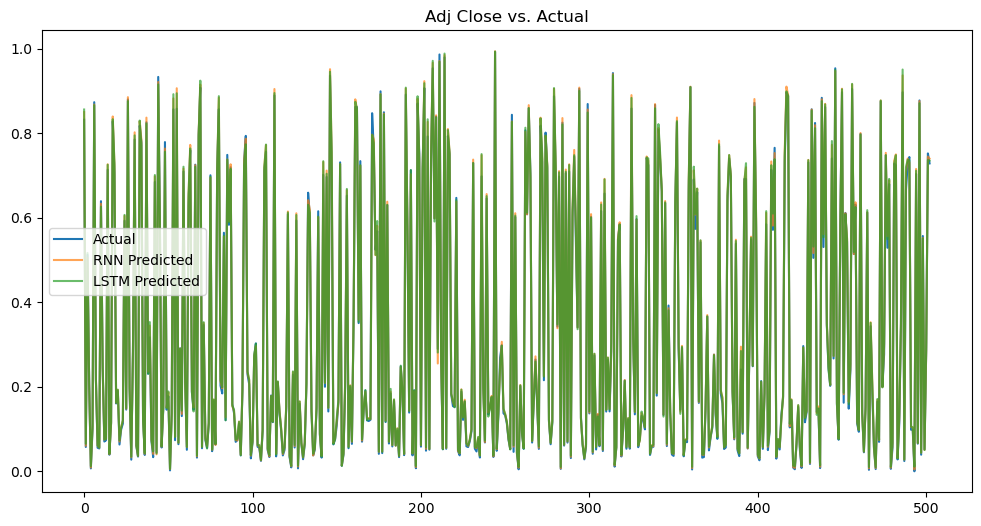

In [33]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()



plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)

plt.legend()
plt.title('Adj Close vs. Actual')
plt.show()